In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from optics import OPTICS
# https://scikit-learn.org/dev/modules/generated/sklearn.cluster.OPTICS.html

PCA_COMPONENTS = None
STANDARDIZE = False

digits = load_digits()

if PCA_COMPONENTS:
    digits['data'] = PCA(n_components=PCA_COMPONENTS).fit_transform(digits['data'])
    
if STANDARDIZE:
    scaler = StandardScaler()
    digits['data'] = scaler.fit_transform(digits['data'])

digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [2]:
def bench_k_means(estimator, name, data, labels, sample_size=None):
    estimator.fit(data)
    print('homogeneity_score', metrics.homogeneity_score(labels, estimator.labels_))
    print('completeness_score', metrics.completeness_score(labels, estimator.labels_))
    print('v_measure_score', metrics.v_measure_score(labels, estimator.labels_))
    print('adjusted_rand_score', metrics.adjusted_rand_score(labels, estimator.labels_))
    print('adjusted_mutual_info_score', metrics.adjusted_mutual_info_score(labels,  estimator.labels_))
    print('silhouette_score', metrics.silhouette_score(data, estimator.labels_, metric='euclidean', sample_size=sample_size))
    
    
def elbow_curve(X, Y, k_range, subsampling=None):
    """
    Function to generate a K-means elbow curve plot, for selecting the optimal K value.
    :param k_range: Integer, with maximal k value --> range(1, k_range) models will be trained
    :param subsampling: Value between 0 and 1 for uniform subsampling. None to disable.
    """
    if subsampling != None:
        X, Y = ml_helpers.subsample(X, Y, subsampling)

    Ks = range(1, k_range+1)
    km = [KMeans(n_clusters=k, n_jobs=5, max_iter=500) for k in Ks]
    fitted = [km[i].fit(X) for i in range(len(km))]
    sse = [fitted[i].inertia_ for i in range(len(km))] # Sum of squared distances of samples to their closest cluster center.
                                                       # / sum of squared errors (SSE) dist = np.sqrt(np.sum(diff ** 2, axis=1))
    plt.xticks(range(1, k_range))
    plt.plot(Ks, sse)
    plt.title('K-means elbow curve')
    plt.xlabel('k')
    plt.ylabel('SSE')

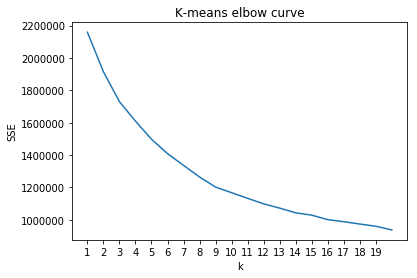

In [3]:
k_range = 20
elbow_curve(digits['data'], digits['target'], k_range, subsampling=None)
# bench_k_means(KMeans(init='k-means++', n_clusters=10, n_init=10), 'K-means', digits['data'], digits['target'])

In [4]:
estimator = KMeans(init='k-means++', n_clusters=10, n_init=10)
# estimator = OPTICS(metric="euclidean")
estimator.fit(digits['data'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
# estimator.cluster_centers_
estimator.labels_

array([3, 7, 7, ..., 7, 9, 9])

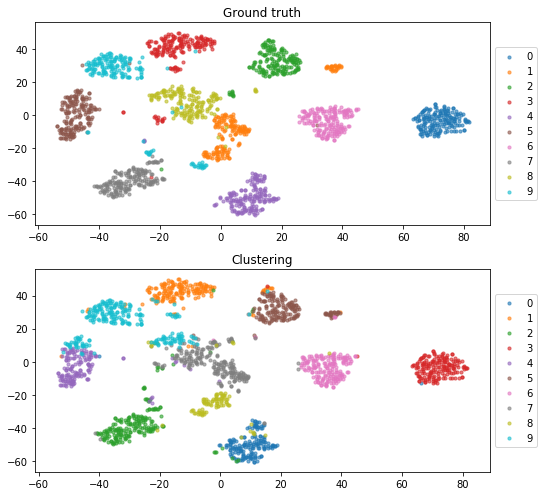

In [6]:
cluster_ids = np.unique(estimator.labels_)
# x_2d = PCA(n_components=2).fit_transform(digits['data'])
#x_2d = TSNE(n_components=2, init='random', random_state=0, perplexity=70).fit_transform(digits['data'])
x_2d = TSNE(n_components=2, random_state=0).fit_transform(digits['data'])


fig, ax = plt.subplots(2, figsize=(7,7))
# | plot ground truth

for label in digits['target_names']:
    ax[0].scatter(x_2d[digits['target'] == label, 0], x_2d[digits['target'] == label, 1], label=label, marker="o", s=10, alpha=0.6)
    
box = ax[0].get_position()
ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current ax[0]is
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].set_title('Ground truth')

# | plot found clustering
for label in cluster_ids:
    ax[1].scatter(x_2d[estimator.labels_ == label, 0], x_2d[estimator.labels_ == label, 1], label=label, marker="o", s=10, alpha=0.6)
    
box = ax[1].get_position()
ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current ax[0]is
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].set_title('Clustering')

fig.tight_layout()

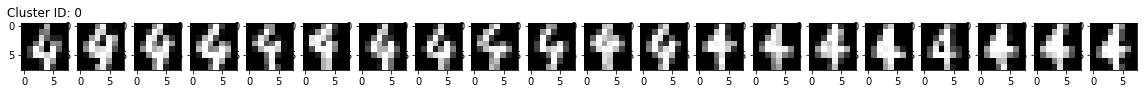

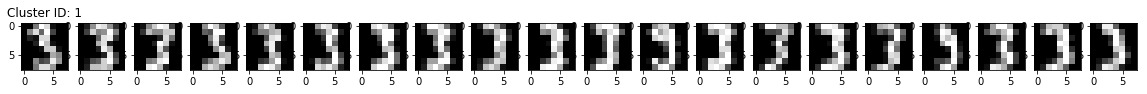

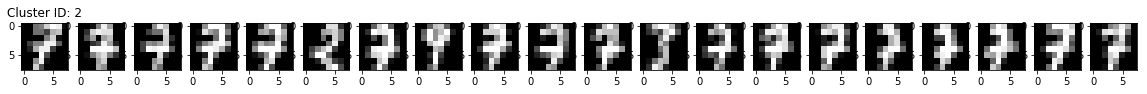

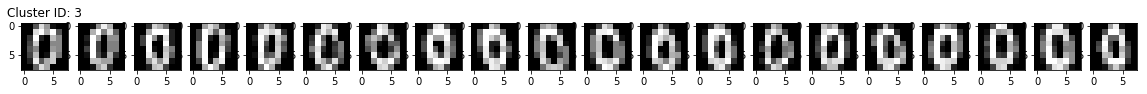

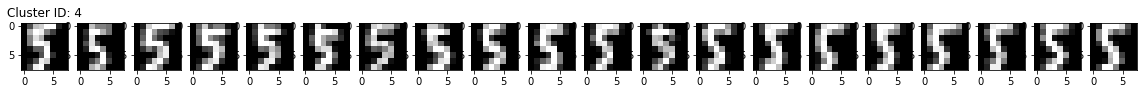

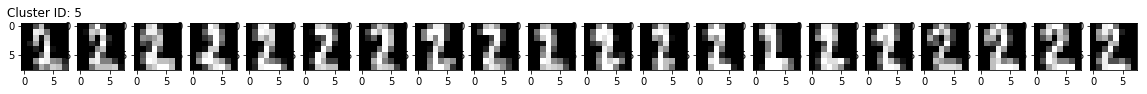

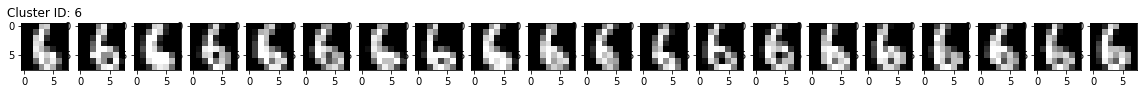

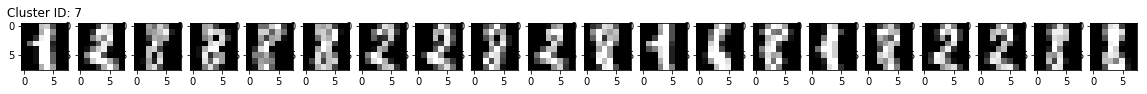

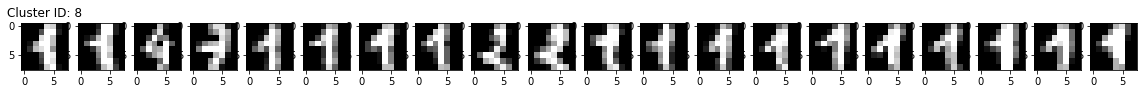

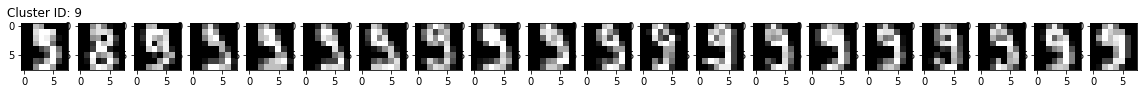

In [7]:
cluster_ids = np.unique(estimator.labels_)
show_nr_images = 20

for c_id in cluster_ids:
    fig, ax = plt.subplots(1, show_nr_images, figsize=(20,5))

    for i in range(show_nr_images):
        ax[i].imshow(digits['images'][estimator.labels_ == c_id][i], cmap='gray')
        
        if i==0:
            ax[i].set_title('Cluster ID: {}'.format(c_id))
